# Úvod do Pandas

## Data

Data naleznete v [databázi Eurostat](https://ec.europa.eu/eurostat/web/main/data/database).

Vyberte *Detailed datasets* -> *Population and social conditions* -> *Demography, population stock and balance (demo)* -> *Population (regional level) (demo_pop)* -> *Population on 1 January by age group, sex and NUTS 3 region (demo_r_pjangrp3)*.

![Eurostat database](images/eurostat_db.png)

V prohlížeči dat stáhněte plný dataset ve formátu CSV (*Full dataset [MIGR_POP1CTZ]* -> *SDMX-CSV 1.0*).

![Eurostat dataviewer](images/eurostat_db_viewer.png)

## Načtěte data do *pandas*

In [1]:
filename = 'demo_r_pjangrp3_linear.csv.gz'
# pozn. k 'filename':
# a) data musi byt ve stejnem adresari, ve kterem se nachazi vas notebook
# b) nebo specifikujte absolutni cestu

import pandas as pd
df = pd.read_csv(filename, compression='gzip')

Nahraná data zobrazíme.

In [2]:
df

DATAFLOW        LAST UPDATE freq sex unit    age  \
0        ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
1        ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
2        ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
3        ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
4        ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
...                             ...                ...  ...  ..  ...    ...   
1125890  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1125891  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1125892  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1125893  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1125894  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   

           geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0           AL         2014    1430827      NaN  
1           AL         2015    1424597      NaN  
2           AL         2016    1417141      NaN  
3           AL         2017    1423050      NaN  
4           AL         2018    1431715      NaN  
...        ...          ...        ...      ...  
1125890  UKN16         2015       7764      NaN  
1125891  UKN16         2016       7720      NaN  
1125892  UKN16         2017       7712      NaN  
1125893  UKN16         2018       7659      NaN  
1125894  UKN16         2019       7654      NaN  

[1125895 rows x 10 columns]

## Jednotlivé hodnoty

In [3]:
# pohlavi
df["sex"].unique()

array(['F', 'M', 'T'], dtype=object)

In [4]:
# datace informace
df["TIME_PERIOD"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

Seřaďme hodnoty.

In [5]:
import numpy as np
np.sort(df["TIME_PERIOD"].unique())

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

## Filtrování dat

Filtrování podle jednoho sloupce.

In [6]:
df[df["geo"] == "CZ"]

DATAFLOW        LAST UPDATE freq sex unit    age  \
1865     ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
1866     ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
1867     ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
1868     ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
1869     ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   F   NR  TOTAL   
...                             ...                ...  ...  ..  ...    ...   
1110293  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1110294  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1110295  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1110296  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   
1110297  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  Y_LT5   

        geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
1865     CZ         2014    5350039      NaN  
1866     CZ         2015    5361348      NaN  
1867     CZ         2016    5367513      NaN  
1868     CZ         2017    5378133      NaN  
1869     CZ         2018    5390264      NaN  
...      ..          ...        ...      ...  
1110293  CZ         2018     560763      NaN  
1110294  CZ         2019     567172      NaN  
1110295  CZ         2020     568823      NaN  
1110296  CZ         2021     558225        b  
1110297  CZ         2022     558098      NaN  

[579 rows x 10 columns]

Filtrování podle více sloupců.

In [7]:
df[(df["geo"] == "CZ") & (df["TIME_PERIOD"] == 2022) & (df["sex"] == 'T') & (df["age"] == 'TOTAL')]

DATAFLOW        LAST UPDATE freq sex unit    age  \
753989  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   

       geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
753989  CZ         2022   10516707      NaN

Definujme funkci, která bude vracet počet obyvatel pro zvolený NUTS kód a rok.

In [8]:
def population_by_country(code, year):
    return int(df[(df["geo"] == code) & (df["TIME_PERIOD"] == year) & (df["sex"] == 'T') & (df["age"] == 'TOTAL')]["OBS_VALUE"].values[0])

population_by_country('CZ', 2022)

10516707

In [9]:
population_by_country('PL', 2022)

37654247

Definujme funkci, která bude vracet počet obyvatel podle pohlaví pro zvolený NUTS kód a rok.

In [10]:
def population_by_country_sex(code, year):
    return df[(df["geo"] == code) & (df["TIME_PERIOD"] == year) & (df["age"] == 'TOTAL')][["sex", "OBS_VALUE"]].to_dict('list')

population_by_country_sex('CZ', 2022)

{'sex': ['F', 'M', 'T'], 'OBS_VALUE': [5332932, 5183775, 10516707]}

Definujme funkci, která bude vracet počet obyvatel podle pohlaví a procentuální podíl žen pro zvolený NUTS kód a rok. Hodnota bude vrácena jako slovník.

In [11]:
def population_by_country_sex_p(code, year):
    res = df[(df["geo"] == code) & (df["TIME_PERIOD"] == year) & (df["age"] == 'TOTAL')][["sex", "OBS_VALUE"]].to_dict('list')
    f_idx = res["sex"].index("F")
    f = res["OBS_VALUE"][f_idx]
    t_idx = res["sex"].index("T")
    t = res["OBS_VALUE"][t_idx]
    
    res_dict = {}
    i = 0
    for k in res["sex"]:
        res_dict[k] = int(res["OBS_VALUE"][i])
        i += 1
        
    res_dict["F_p"] = round(f/t, 2)
    return res_dict

population_by_country_sex_p('CZ', 2022)

{'F': 5332932, 'M': 5183775, 'T': 10516707, 'F_p': 0.51}

In [12]:
population_by_country_sex_p('PL', 2022)

{'F': 19443954, 'M': 18210293, 'T': 37654247, 'F_p': 0.52}

## Filtrování dat na úrovních NUTS

In [13]:
df[(df["TIME_PERIOD"] == 2022) & (df["sex"] == 'T') & (df["age"] == 'TOTAL')]

DATAFLOW        LAST UPDATE freq sex unit    age  \
752124  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752133  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752142  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752151  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752160  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
...                            ...                ...  ...  ..  ...    ...   
768174  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
768183  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
768192  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
768201  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
768210  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   

          geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
752124     AL         2022    2793592      NaN  
752133    AL0         2022    2793592      NaN  
752142   AL01         2022     783970      NaN  
752151  AL011         2022     109585      NaN  
752160  AL012         2022     291325      NaN  
...       ...          ...        ...      ...  
768174   TRC3         2022    2367645      NaN  
768183  TRC31         2022     862757      NaN  
768192  TRC32         2022     626319      NaN  
768201  TRC33         2022     546589      NaN  
768210  TRC34         2022     331980      NaN  

[1778 rows x 10 columns]

Filtrujme NUTS úrovně 0 (NUTS identifikátor má přesně dva znaky).

In [14]:
df[(df["TIME_PERIOD"] == 2022) & (df["sex"] == 'T') & (df["age"] == 'TOTAL') & (df["geo"].apply(lambda x: len(x) == 2))].head(10)

DATAFLOW        LAST UPDATE freq sex unit    age  \
752124  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752286  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
752718  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
753305  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
753638  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
753953  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
753989  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
754205  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
758309  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   
758471  ESTAT:DEMO_R_PJANGRP3(1.0)  28/09/23 23:00:00    A   T   NR  TOTAL   

       geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
752124  AL         2022    2793592      NaN  
752286  AT         2022    8978929      NaN  
752718  BE         2022   11617623      NaN  
753305  BG         2022    6838937      NaN  
753638  CH         2022    8738791      NaN  
753953  CY         2022     904705      NaN  
753989  CZ         2022   10516707      NaN  
754205  DE         2022   83237124      NaN  
758309  DK         2022    5873420      NaN  
758471  EE         2022    1331796      NaN

Definujme funkci, která bude vracet zemi a počet obyvatel pro zvolený rok. Volitelné argumenty budou NUTS úroveň, pohlaví a NUTS vzor.

In [15]:
def population_by_nuts(year, level=0, sex='T', nuts=None):
    data = df[(df["TIME_PERIOD"] == year) & (df["sex"] == sex) & (df["age"] == 'TOTAL') & (df["geo"].apply(lambda x: len(x) == level+2))]
    if nuts is not None:
        data = data[data["geo"].str.match(nuts)]

        
    return data[["geo", "OBS_VALUE"]]

population_by_nuts(2022)

geo  OBS_VALUE
752124  AL    2793592
752286  AT    8978929
752718  BE   11617623
753305  BG    6838937
753638  CH    8738791
753953  CY     904705
753989  CZ   10516707
754205  DE   83237124
758309  DK    5873420
758471  EE    1331796
758551  EL   10459782
759181  ES   47432893
759976  FI    5548241
760219  FR   67871925
761521  HR    3862305
761750  HU    9689010
762059  IE    5060004
762176  IS     376248
762221  IT   59030133
763448  LI      39308
763484  LT    2805998
763610  LU     645397
763646  LV    1875757
763727  ME     617683
763763  MK    1837114
763883  MT     520971
763928  NL   17590672
764441  NO    5425270
764676  PL   37654247
765558  PT   10352042
765882  RO   19042455
766377  RS    6797105
766572  SE   10452326
766869  SI    2107180
767013  SK    5434712
767139  TR   84680273

Podívejme se, jak vypadá rozdělení žen v ČR podle krajů.

In [16]:
population_by_nuts(2022, level=2, sex="F", nuts="CZ")

geo  OBS_VALUE
1891  CZ01     652285
1909  CZ02     701332
1927  CZ03     613767
1954  CZ04     547501
1981  CZ05     755586
2017  CZ06     854930
2044  CZ07     608263
2071  CZ08     599268

## Grafy

Podívejme se na graf znázorňující počet obyvatel pro jednotlivé země.

<AxesSubplot: title={'center': 'Počet obyvatel (2021, total)'}, xlabel='NUTS0', ylabel='Počet obyvatel'>

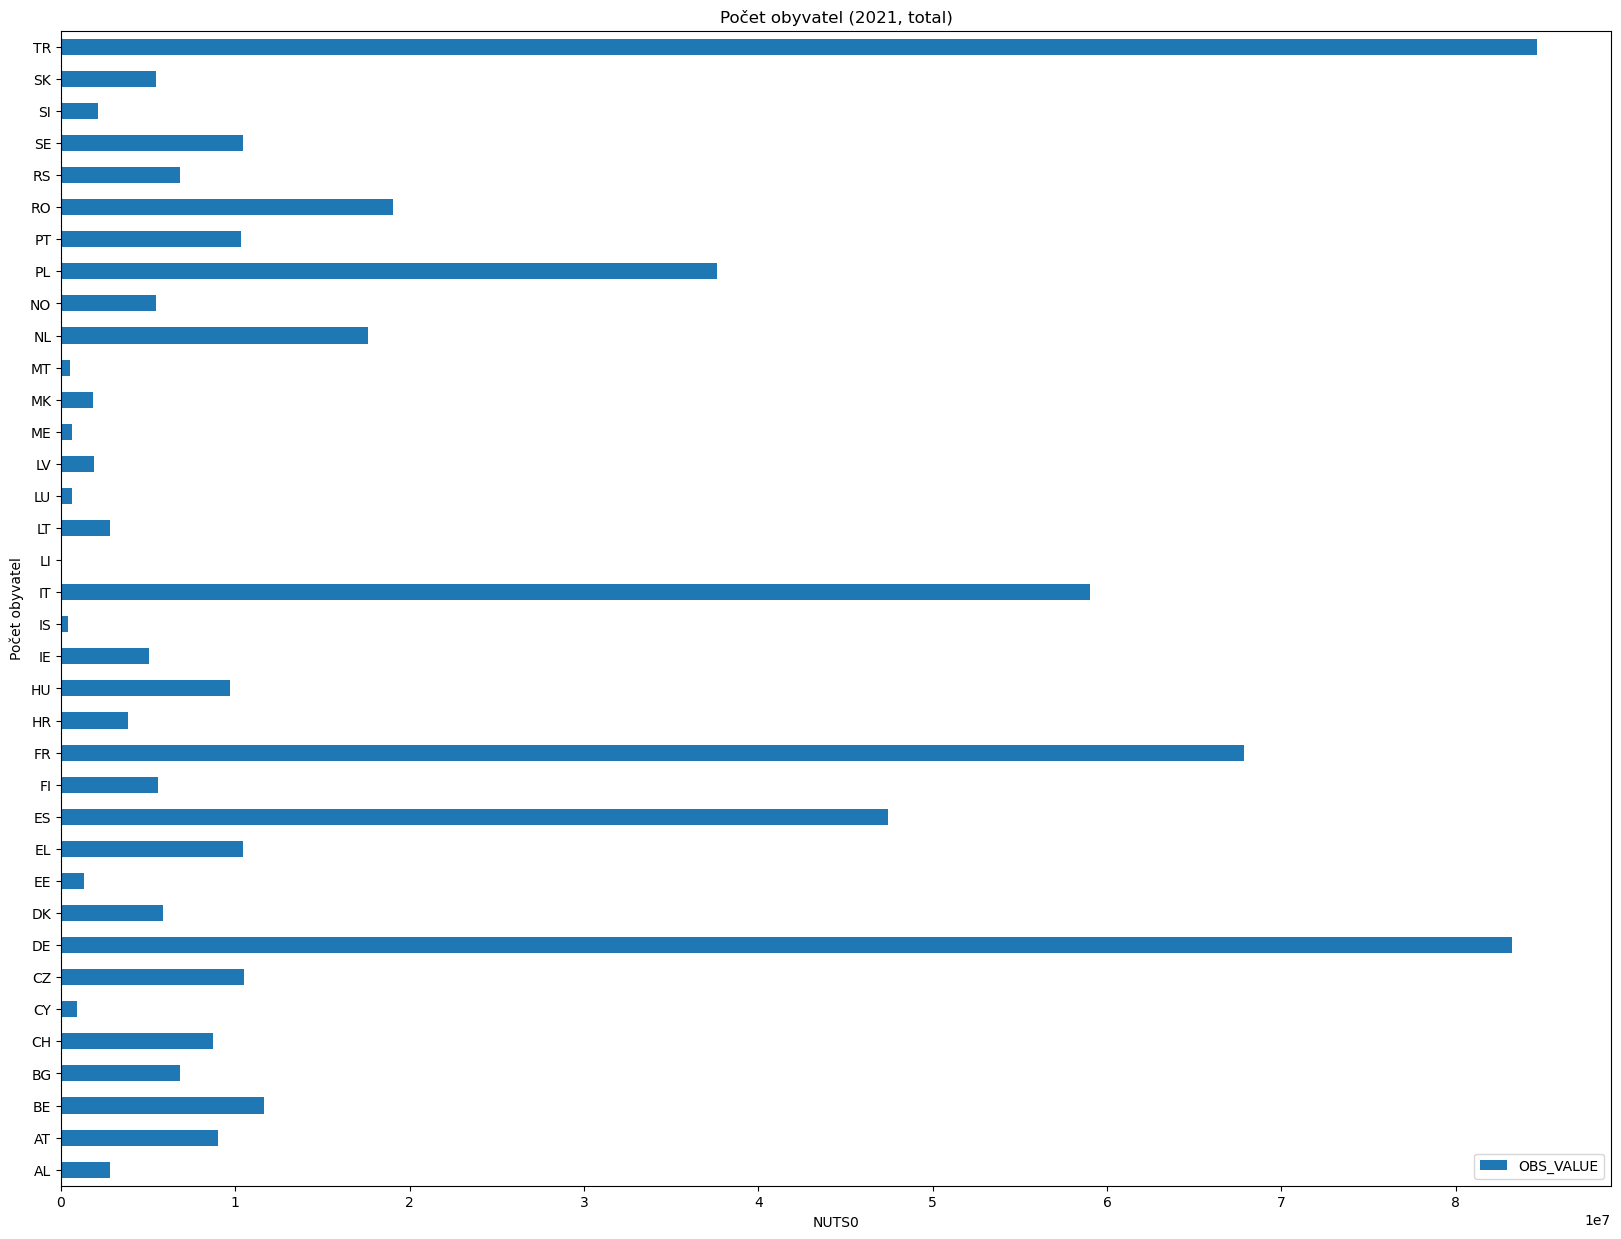

In [17]:
data = population_by_nuts(2022)
data.plot(kind="barh", x="geo", y="OBS_VALUE", xlabel="NUTS0", ylabel="Počet obyvatel",
          title=f"Počet obyvatel (2021, total)", figsize=(20, 15))

Definujme funkci, která bude generovat graf s počtem obyvatel pro zvolený rok. Volitelné argumenty budou NUTS úroveň, pohlaví a NUTS vzor.

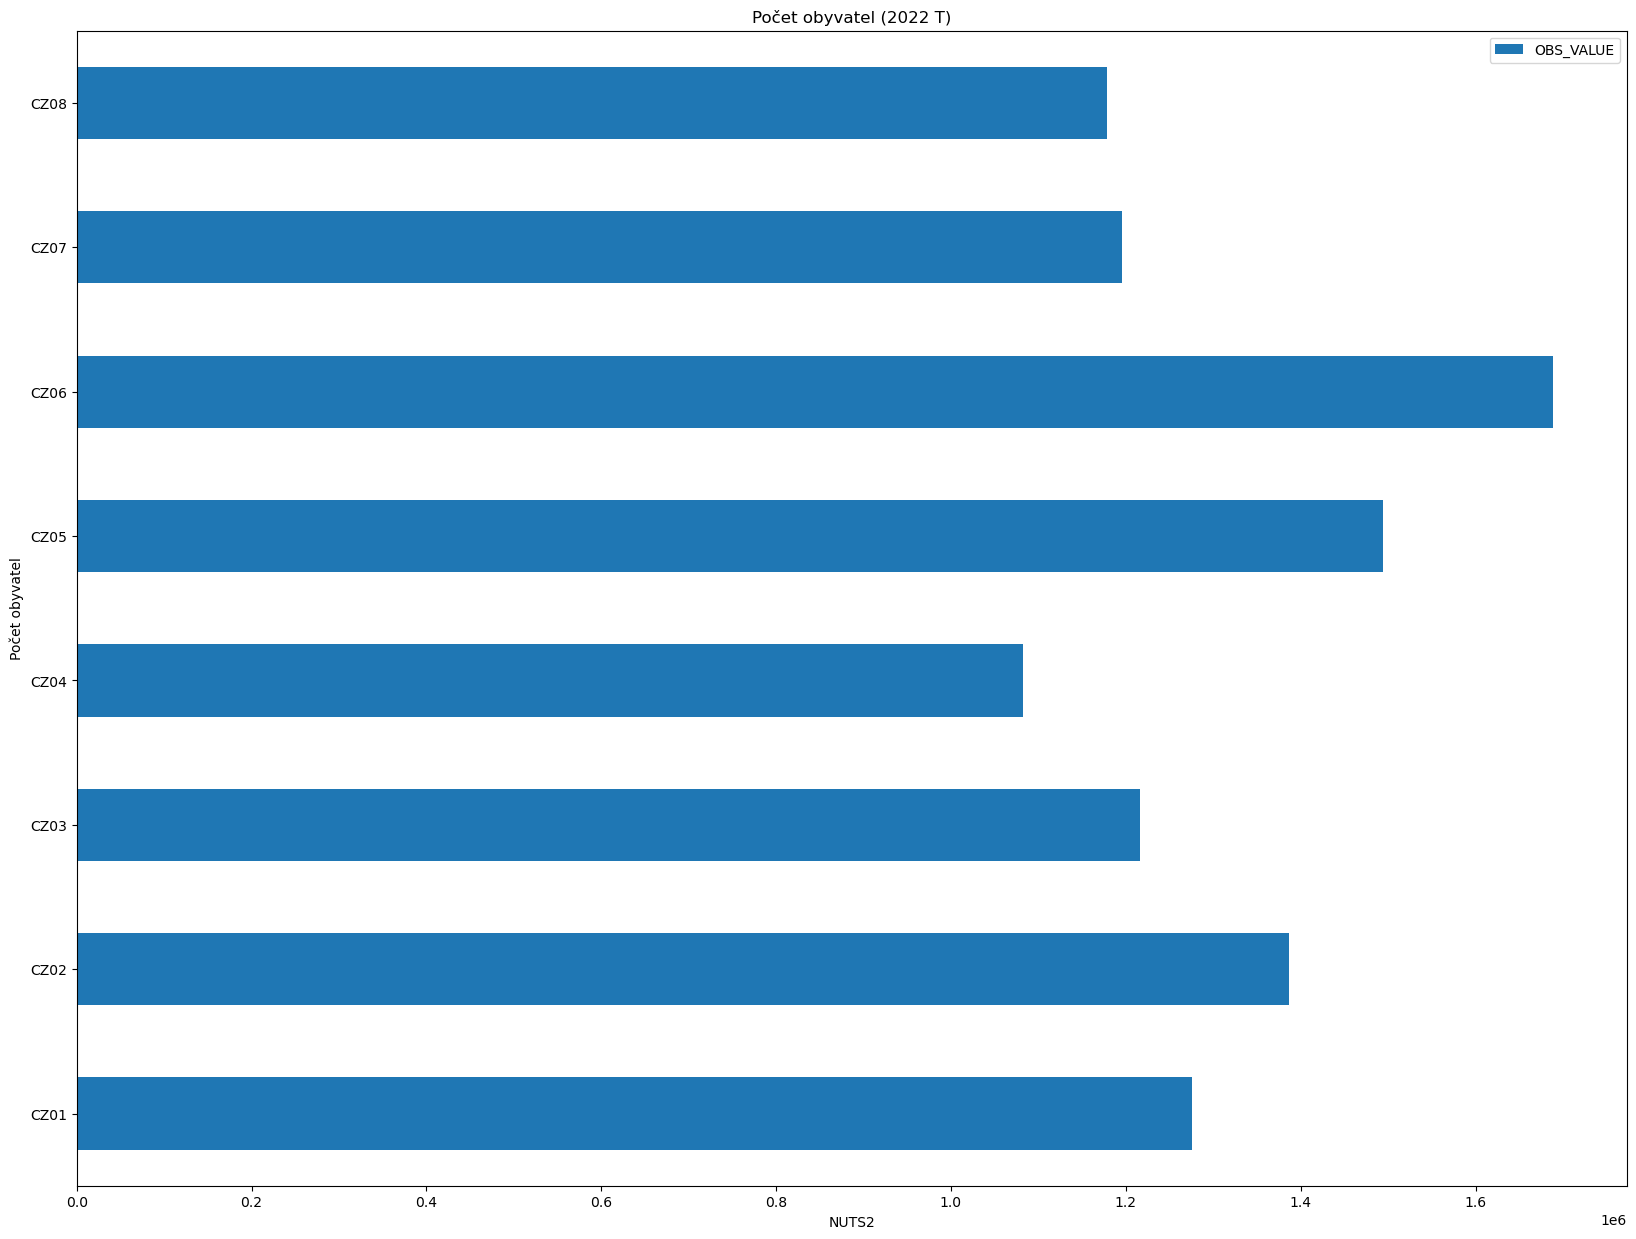

In [18]:
def print_graph(year, level=0, sex="T", nuts=None):
    data = population_by_nuts(year, level, sex, nuts)
    data.plot(kind="barh", x="geo", y="OBS_VALUE", xlabel=f"NUTS{level}", ylabel="Počet obyvatel",
              title=f"Počet obyvatel ({year} {sex})", figsize=(20, 15))
    
print_graph(2022, level=2, nuts="CZ")

Podívejme se, jak vypadá rozdělení žen v ČR podle krajů.

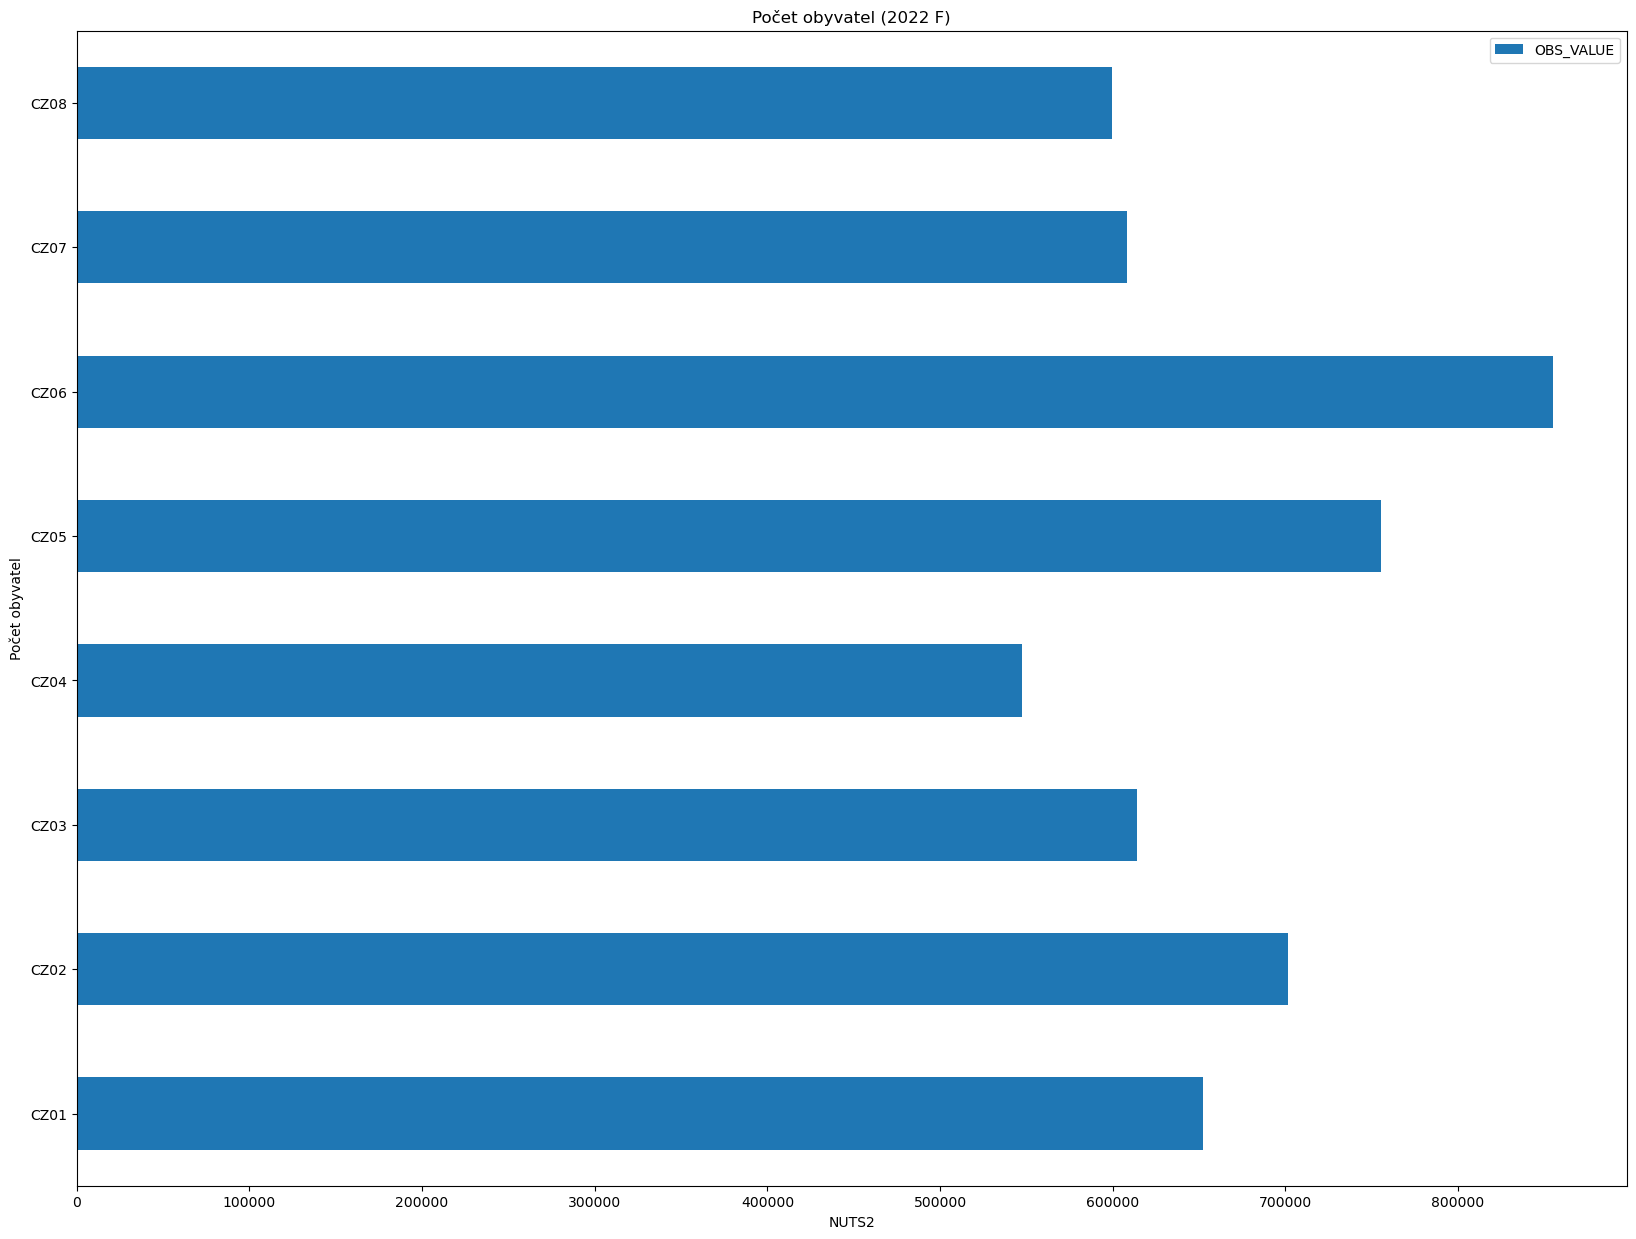

In [19]:
print_graph(2022, level=2, nuts="CZ", sex="F")